## AI Applications in Biology (BSC6936 / IDS4139 / PSB4916)
## **Image Segmentation Using Traditional Machine Learning**
### **Prepared by [Tucker Hindle](https://www.linkedin.com/in/tuckerhindle)** (thindle2016@fau.edu)
### Florida Atlantic University Lab Schools Research Program

#### Link for sharing: https://colab.research.google.com/drive/14rx8REpuyinrfE_PiNDKDOixVdv7rkjB?usp=sharing

---------
### Adapted from [@DigitalSreeni](https://www.youtube.com/channel/UC34rW-HtPJulxr5wp2Xa04w_) Dr. Sreenivas Bhattiprolu (ZEISS arivis [@Apeer_micro](https://www.youtube.com/channel/UCVrG0AsRMb0pPcxzX75SusA))'s series

### Python for Microscopists - https://github.com/bnsreenu/python_for_microscopists

### Data available from https://drive.google.com/file/d/1HWtBaSa-LTyAMgf2uaz1T9o1sTWDBajU/view

---------

We will follow the Machine Learning Workflow (by Geron)

https://github.com/ageron/handson-ml3

1. Look at the big picture. (Start with an interesting question)
2. Get the data. (Quality data collection + preprocessing)
3. Discover and visualize the data to gain insights. (EDA)
4. Prepare the data for Machine Learning
algorithms.
5. Select a model and train it.
6. Fine-tune your model. (Reiterating based on model evaluation)
7. Present your solution. (Communicate results)
8. Deploy and maintain your system.

### **Understanding the dataset**

Sample: sandstone cylinder (size of ~2 mm diameter). Sandstone is a sedimentary rock compacted over time; this sample is composed of quartz, clay, pyrite.


Imaging: 3D X-ray / micro-CT scan of a sandstone sample.

> " " " Micro-CT is a 3D imaging technique utilizing X-rays to see inside an object, slice by slice.
> A 3D model reconstruction is processed by capturing a series of 2D cross-sectional planar X-ray images.
> Micro-CT data provides volumetric information about the microstructure using a nondestructive approach
> Source: https://www.microphotonics.com/what-is-micro-ct-an-introduction " " "


Data: a 3D volume (tiff stack) slice by slice of 462 images, each 996x1024 pixels. The pixel size is 2.2315 microns in each 2D slice.

* Class 1 = Background, Air/Void (dark pixels)
* Class 2 = Clay (darker grey with texture)
* Class 3 = Quartz (light grey)
* Class 4 = Pyrite (bright pixels)

Principle-of-subsampling-illustrated-with-a-sandstone-core-of-the-Longyearbyen-CO2-Lab.jpg

Image credit: Van Stappen, Jeroen. (2017). A micro-CT investigation into pore-scale CO2 sequestration processes in fractured reservoir rocks.

#### **Visualize 3D volume (tiff stack) slice by slice**



---



#### Click to view: https://drive.google.com/file/d/1H6c-geDor2Q1dMU7A0CTqzb0xbgSE28q/view?usp=sharing



---



#### **Goal: Instance Segmentation**

Segment objects within an image, delineating the boundaries of each object and assigning a unique label to each object.

This type of image segmentation produces a pixel-wise map of the image, where each pixel is assigned to a specific object instance.

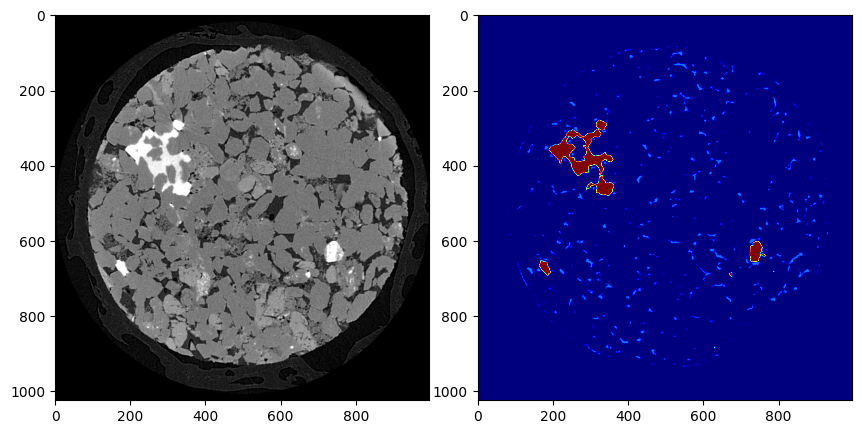

### Shift from Tabular to Image Data

#### **Example of Tabular Data**

#### **Diabetes dataset**

Number of Instances:
n = 442 diabetes patients

Number of Attributes:
First 10 columns are numeric predictive values (independent variables)

Target:
Column 11 is a quantitative measure of disease progression one year after baseline

Features (Attribute Information):

* age = age in years

* sex = sex

* bmi = body mass index

* bp = average blood pressure

* s1 = tc, total serum cholesterol

* s2 = ldl, low-density lipoproteins

* s3 = hdl, high-density lipoproteins

* s4 = tch, total cholesterol / HDL

* s5 = ltg, possibly log of serum triglycerides level

* s6 = glu, blood sugar level

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes_X, diabetes_y = load_diabetes(return_X_y=True , as_frame=True)

pd.concat([diabetes_X, diabetes_y], axis=1)

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019907 -0.017646   151.0  
1   -0.039493 -0.068332 -0.092204    75.0  
2   -0.002592  0.002861 -0.025930   141.0  
3    0.034309  0.022688 -0.009362   206.0  
4   -0.002592 -0.031988 -0.046641   135.0  
..        ...       ...       ...     ...  
437 -0.002592  0.031193  0.007207   178.0  
438  0.034309 -0.018114  0.044485   104.0  
439 -0.011080 -0.046883  0.015491   132.0  
440  0.026560  0.044529 -0.025930   220.0  
441 -0.039493 -0.004222  0.003064    57.0  

[442 rows x 11 columns]

#### **Example of Image Data**

Image credit: Al-Azzeh, Jamil & Zahran, Bilal & Al Qadi, Ziad & Ayyoub, Belal & Mesleh, Muhammed. (2020). Creating Color Image Signature Based On Laplacian Equation. _JOIV: International Journal on Informatics Visualization_. 3. DOI: 10.30630/joiv.3.2.223.

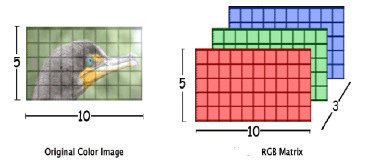

how a computer sees images

desc-computer-sees-image.png

Instead of a structured table of predictive measurements, how can we extract valuable information from raw images that can be used in the ML algorithms we have seen so far in this course?

### Start Here: Imports + Google Drive

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
from google.colab.patches import cv2_imshow

from skimage.filters import roberts, sobel, scharr, prewitt
from scipy import ndimage as nd

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import metrics

import pickle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load Image (Raw Data)

Data available from https://drive.google.com/file/d/1HWtBaSa-LTyAMgf2uaz1T9o1sTWDBajU/view

1. Specify the file path to a single 2D slice (tiff image file)
2. Load image from file and view its dimentions
3. Convert/Handle as a grayscale image, then visualize raw data

In [4]:
img_path = '/content/drive/MyDrive/Colab Notebooks/PSB4916_NeuralDataScience/traditional-ml-segmentation/partial_labels_for_traditional_ML/sandstone_train_images.tif'

In [5]:
img = cv2.imread(img_path)
img.shape

(1024, 996, 3)

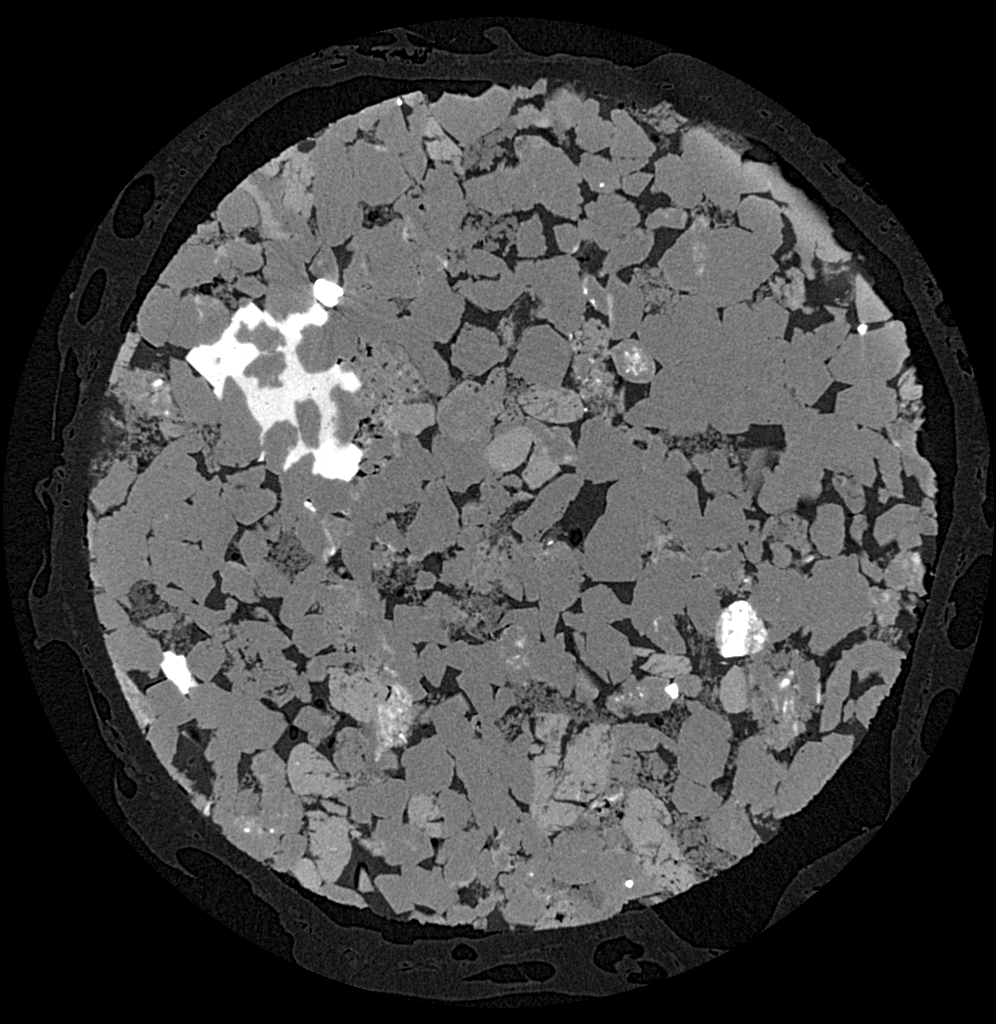

In [6]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

### **Generate Features to Prepare Data for ML Algorithms**

### Overview:

### - Create an empty dataframe to hold extracted features.

### - First, we generate a feature from the image (intensity, edges, denoising, texture, etc.).

### - Then, we flatten to 1D array and concatenate (horizontally stack) as a new column in the master dataframe.

#### Original image pixel values

The varying density of objects within the Micro-CT scan will be visible; hence, the pixel values themselves are a useful feature (explanatory predictor).  Flatten image into 1D array then save as a Pandas DataFrame column.

In [7]:
# Image (2D array)
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
img_flattened = img.reshape(-1)
img_flattened

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [9]:
# Save original image pixels into a data frame. This is Feature #1.
df = pd.DataFrame()

df['Original Image'] = img_flattened
df

Original Image
0                     0
1                     0
2                     0
3                     0
4                     0
...                 ...
1019899               0
1019900               0
1019901               0
1019902               0
1019903               0

[1019904 rows x 1 columns]

#### Edge Detection

> Edges help to estimate structure and properties of the objects in images.
> Represented by a significant local change in the image intensity (brightness), discontinuity wehre image intensity abruptly changes.
> https://www.cse.usf.edu/~r1k/MachineVisionBook/MachineVision.files/MachineVision_Chapter5.pdf

##### Canny

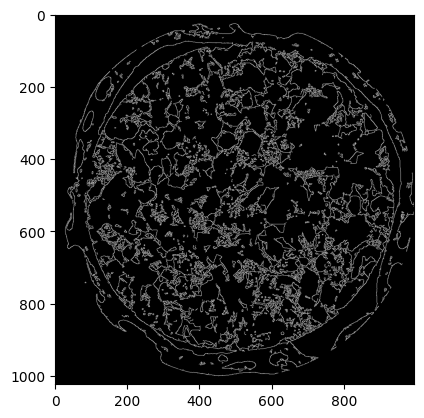

In [10]:
#CANNY EDGE
edges = cv2.Canny(img, 100,200)   #Image, min and max values
plt.imshow(edges, cmap='gray')

In [11]:
edges1 = edges.reshape(-1)
df['Canny Edge'] = edges1  #Add column to original dataframe
df

Original Image  Canny Edge
0                     0           0
1                     0           0
2                     0           0
3                     0           0
4                     0           0
...                 ...         ...
1019899               0           0
1019900               0           0
1019901               0           0
1019902               0           0
1019903               0           0

[1019904 rows x 2 columns]

##### Roberts, Sobel, Scharr, Prewitt Edge Filters

In [12]:
from skimage.filters import roberts, sobel, scharr, prewitt

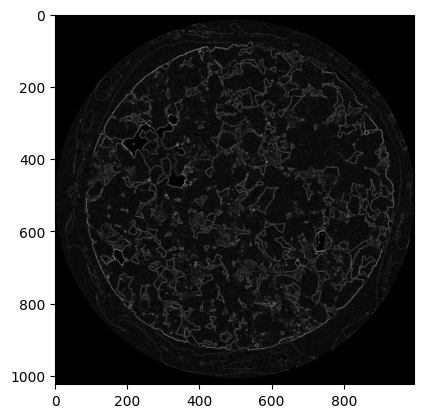

In [13]:
#ROBERTS EDGE
edge_roberts = roberts(img)
edge_roberts1 = edge_roberts.reshape(-1)
df['Roberts'] = edge_roberts1
plt.imshow(edge_roberts, cmap='gray')

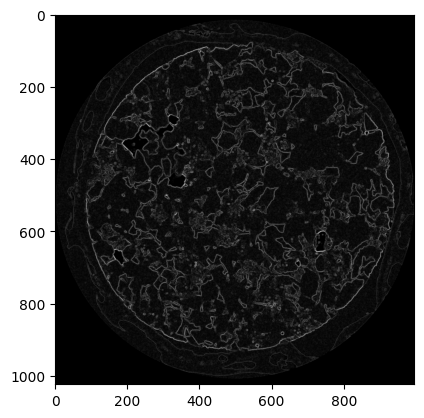

In [14]:
#SOBEL
edge_sobel = sobel(img)
edge_sobel1 = edge_sobel.reshape(-1)
df['Sobel'] = edge_sobel1
plt.imshow(edge_sobel, cmap='gray')

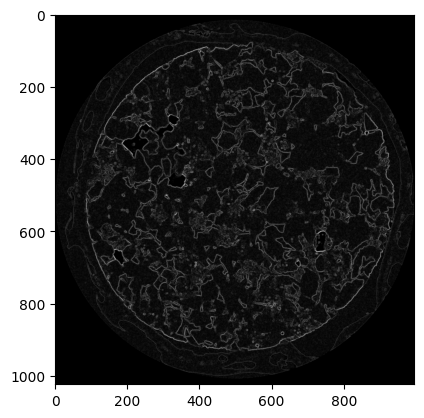

In [15]:
#SCHARR
edge_scharr = scharr(img)
edge_scharr1 = edge_scharr.reshape(-1)
df['Scharr'] = edge_scharr1
plt.imshow(edge_scharr, cmap='gray')

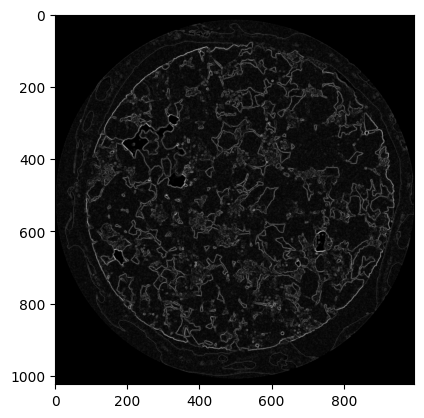

In [16]:
#PREWITT
edge_prewitt = prewitt(img)
edge_prewitt1 = edge_prewitt.reshape(-1)
df['Prewitt'] = edge_prewitt1
plt.imshow(edge_prewitt, cmap='gray')

In [17]:
# View added features in master dataframe
df

Original Image  Canny Edge  Roberts  Sobel  Scharr  Prewitt
0                     0           0      0.0    0.0     0.0      0.0
1                     0           0      0.0    0.0     0.0      0.0
2                     0           0      0.0    0.0     0.0      0.0
3                     0           0      0.0    0.0     0.0      0.0
4                     0           0      0.0    0.0     0.0      0.0
...                 ...         ...      ...    ...     ...      ...
1019899               0           0      0.0    0.0     0.0      0.0
1019900               0           0      0.0    0.0     0.0      0.0
1019901               0           0      0.0    0.0     0.0      0.0
1019902               0           0      0.0    0.0     0.0      0.0
1019903               0           0      0.0    0.0     0.0      0.0

[1019904 rows x 6 columns]

#### Gaussian Blur

> " " "The Gaussian blur feature is obtained by a low-pass filter blurring (smoothing) an image using a Gaussian function to reduce image noise and negligible details in an image, while preserving edges." " "
> https://www.sciencedirect.com/topics/engineering/gaussian-blur
> https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html

In [18]:
from scipy import ndimage as nd

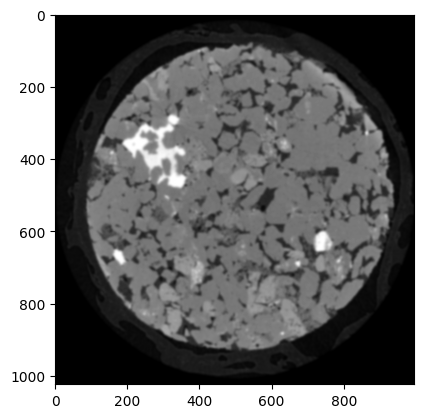

In [19]:
#GAUSSIAN with sigma=3
gaussian_img = nd.gaussian_filter(img, sigma=3)  # 3 stddev for kernel
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1
plt.imshow(gaussian_img, cmap='gray')

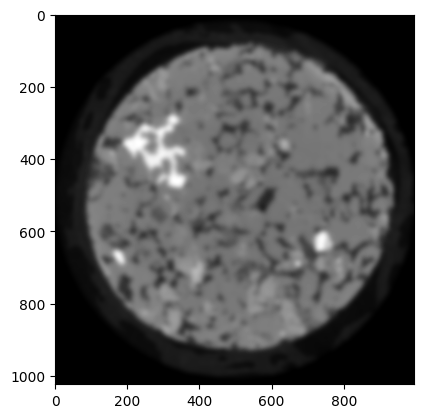

In [20]:
#GAUSSIAN with sigma=7
gaussian_img2 = nd.gaussian_filter(img, sigma=7)  # 7 stddev for kernel
gaussian_img3 = gaussian_img2.reshape(-1)
df['Gaussian s7'] = gaussian_img3
plt.imshow(gaussian_img2, cmap='gray')

#### Median Filter

Denoising by taking neighborhood of pixels and replacing middle with the median pixel value.

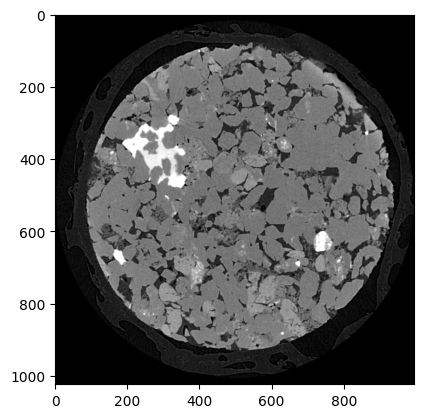

In [21]:
#MEDIAN with sigma=3
median_img = nd.median_filter(img, size=3) #shape of filter array
median_img1 = median_img.reshape(-1)
df['Median s3'] = median_img1
plt.imshow(median_img, cmap='gray')

#### Variance Filter

Reveals edges in the image by taking neighborhood of pixels and replacing middle value with the neighborhood variance.

In [22]:
#VARIANCE with size=3
variance_img = nd.generic_filter(img, np.var, size=3)
variance_img1 = variance_img.reshape(-1)
df['Variance s3'] = variance_img1  #Add column to original dataframe
plt.imshow(variance_img, cmap='gray')

#### Gabor Filters

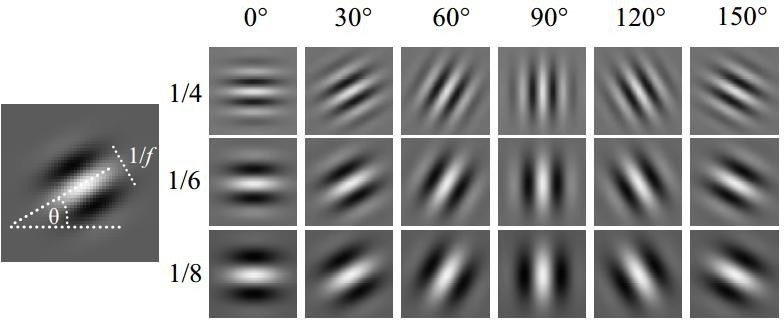

Image credit: Andrezza, Igor & Brasileiro, João & Borges, Erick & Gualberto de Andrade e Silva, Arnaldo & Batista, Leonardo & Gomes, Herman. (2018). A Novel Fingerprint Quality Assessment Based on Gabor Filters. 10.1109/SIBGRAPI.2018.00042.

In [23]:
#Generate Gabor features

print('Gabor Filter Bank')
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []
for theta in range(2):   #Define number of thetas
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5


                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
                #print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)
                kernels.append(kernel)
                #Now filter the image and add values to a new column
                fimg = cv2.filter2D(img_flattened, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label

Gabor Filter Bank
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : s

In [24]:
# View added features in master dataframe
df

Original Image  Canny Edge  Roberts  Sobel  Scharr  Prewitt  \
0                     0           0      0.0    0.0     0.0      0.0   
1                     0           0      0.0    0.0     0.0      0.0   
2                     0           0      0.0    0.0     0.0      0.0   
3                     0           0      0.0    0.0     0.0      0.0   
4                     0           0      0.0    0.0     0.0      0.0   
...                 ...         ...      ...    ...     ...      ...   
1019899               0           0      0.0    0.0     0.0      0.0   
1019900               0           0      0.0    0.0     0.0      0.0   
1019901               0           0      0.0    0.0     0.0      0.0   
1019902               0           0      0.0    0.0     0.0      0.0   
1019903               0           0      0.0    0.0     0.0      0.0   

         Gaussian s3  Gaussian s7  Median s3  Variance s3  ...  Gabor23  \
0                  0            0          0            0  ...        0   
1                  0            0          0            0  ...        0   
2                  0            0          0            0  ...        0   
3                  0            0          0            0  ...        0   
4                  0            0          0            0  ...        0   
...              ...          ...        ...          ...  ...      ...   
1019899            0            0          0            0  ...        0   
1019900            0            0          0            0  ...        0   
1019901            0            0          0            0  ...        0   
1019902            0            0          0            0  ...        0   
1019903            0            0          0            0  ...        0   

         Gabor24  Gabor25  Gabor26  Gabor27  Gabor28  Gabor29  Gabor30  \
0              0        0        0        0        0        0        0   
1              0        0        0        0        0        0        0   
2              0        0        0        0        0        0        0   
3              0        0        0        0        0        0        0   
4              0        0        0        0        0        0        0   
...          ...      ...      ...      ...      ...      ...      ...   
1019899        0        0        0        0        0        0        0   
1019900        0        0        0        0        0        0        0   
1019901        0        0        0        0        0        0        0   
1019902        0        0        0        0        0        0        0   
1019903        0        0        0        0        0        0        0   

         Gabor31  Gabor32  
0              0        0  
1              0        0  
2              0        0  
3              0        0  
4              0        0  
...          ...      ...  
1019899        0        0  
1019900        0        0  
1019901        0        0  
1019902        0        0  
1019903        0        0  

[1019904 rows x 42 columns]

### Labeled Image Mask

Load labeled image annotation

In [25]:
lbl_path = '/content/drive/MyDrive/Colab Notebooks/PSB4916_NeuralDataScience/traditional-ml-segmentation/partial_labels_for_traditional_ML/sandstone_partial_labels_from_APEER_ML.tif'

In [26]:
labeled_img = cv2.imread(lbl_path)
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2GRAY) #grayscale

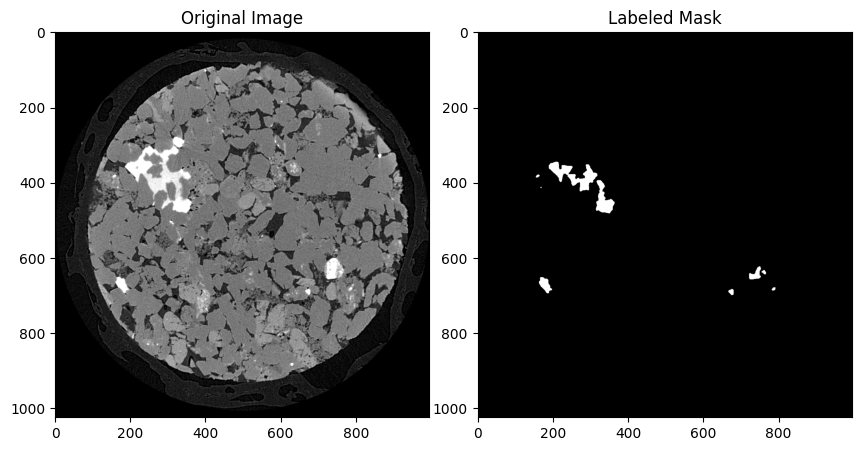

In [27]:
fig = plt.figure(figsize=(20,5))

fig.add_subplot(1,1,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

fig.add_subplot(1,2,2)
plt.title('Labeled Mask')
plt.imshow(labeled_img==4, cmap='gray') # class4 = pyrite

Add target (flattened label mask) to features dataframe

In [28]:
labeled_img1 = labeled_img.reshape(-1)
df['Labels'] = labeled_img1

### View master dataframe prepared for ML

Features:

* Original Pixel Values
* Edge Detection (Canny, Roberts, Sobel, Scharr, Prewitt)
* Denoising (Gaussian, Median, Variance)
* Texture (Gabor)

Target:

* Labeled Pixel Values (class4 = pyrite in sandstone sample)

In [29]:
df

Original Image  Canny Edge  Roberts  Sobel  Scharr  Prewitt  \
0                     0           0      0.0    0.0     0.0      0.0   
1                     0           0      0.0    0.0     0.0      0.0   
2                     0           0      0.0    0.0     0.0      0.0   
3                     0           0      0.0    0.0     0.0      0.0   
4                     0           0      0.0    0.0     0.0      0.0   
...                 ...         ...      ...    ...     ...      ...   
1019899               0           0      0.0    0.0     0.0      0.0   
1019900               0           0      0.0    0.0     0.0      0.0   
1019901               0           0      0.0    0.0     0.0      0.0   
1019902               0           0      0.0    0.0     0.0      0.0   
1019903               0           0      0.0    0.0     0.0      0.0   

         Gaussian s3  Gaussian s7  Median s3  Variance s3  ...  Gabor24  \
0                  0            0          0            0  ...        0   
1                  0            0          0            0  ...        0   
2                  0            0          0            0  ...        0   
3                  0            0          0            0  ...        0   
4                  0            0          0            0  ...        0   
...              ...          ...        ...          ...  ...      ...   
1019899            0            0          0            0  ...        0   
1019900            0            0          0            0  ...        0   
1019901            0            0          0            0  ...        0   
1019902            0            0          0            0  ...        0   
1019903            0            0          0            0  ...        0   

         Gabor25  Gabor26  Gabor27  Gabor28  Gabor29  Gabor30  Gabor31  \
0              0        0        0        0        0        0        0   
1              0        0        0        0        0        0        0   
2              0        0        0        0        0        0        0   
3              0        0        0        0        0        0        0   
4              0        0        0        0        0        0        0   
...          ...      ...      ...      ...      ...      ...      ...   
1019899        0        0        0        0        0        0        0   
1019900        0        0        0        0        0        0        0   
1019901        0        0        0        0        0        0        0   
1019902        0        0        0        0        0        0        0   
1019903        0        0        0        0        0        0        0   

         Gabor32  Labels  
0              0       0  
1              0       0  
2              0       0  
3              0       0  
4              0       0  
...          ...     ...  
1019899        0       0  
1019900        0       0  
1019901        0       0  
1019902        0       0  
1019903        0       0  

[1019904 rows x 43 columns]

### Supervised Learning Using Scikit-Learn

This example uses SVM, specifically a Linear Support Vector Classifier

> `sklearn.svm.LinearSVC()`

Another classifer could be used - for example, a Random Forest Classifier. It is common to compare several algorithms to evaluate model performance and other benefits (e.g., Random Forest can provide feature importances)

> `sklearn.ensemble.RandomForestClassifier()`

#### Define variables X (features) and Y (label)

In [30]:
#Define the dependent variable that needs to be predicted (labels)
Y = df["Labels"].values
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [31]:
#Define the independent variables which are explantory predictors (features)
#Note pandas.DataFrame.pop() is commonly used to do this
X = df.drop(labels = ["Labels"], axis=1)
X

Original Image  Canny Edge  Roberts  Sobel  Scharr  Prewitt  \
0                     0           0      0.0    0.0     0.0      0.0   
1                     0           0      0.0    0.0     0.0      0.0   
2                     0           0      0.0    0.0     0.0      0.0   
3                     0           0      0.0    0.0     0.0      0.0   
4                     0           0      0.0    0.0     0.0      0.0   
...                 ...         ...      ...    ...     ...      ...   
1019899               0           0      0.0    0.0     0.0      0.0   
1019900               0           0      0.0    0.0     0.0      0.0   
1019901               0           0      0.0    0.0     0.0      0.0   
1019902               0           0      0.0    0.0     0.0      0.0   
1019903               0           0      0.0    0.0     0.0      0.0   

         Gaussian s3  Gaussian s7  Median s3  Variance s3  ...  Gabor23  \
0                  0            0          0            0  ...        0   
1                  0            0          0            0  ...        0   
2                  0            0          0            0  ...        0   
3                  0            0          0            0  ...        0   
4                  0            0          0            0  ...        0   
...              ...          ...        ...          ...  ...      ...   
1019899            0            0          0            0  ...        0   
1019900            0            0          0            0  ...        0   
1019901            0            0          0            0  ...        0   
1019902            0            0          0            0  ...        0   
1019903            0            0          0            0  ...        0   

         Gabor24  Gabor25  Gabor26  Gabor27  Gabor28  Gabor29  Gabor30  \
0              0        0        0        0        0        0        0   
1              0        0        0        0        0        0        0   
2              0        0        0        0        0        0        0   
3              0        0        0        0        0        0        0   
4              0        0        0        0        0        0        0   
...          ...      ...      ...      ...      ...      ...      ...   
1019899        0        0        0        0        0        0        0   
1019900        0        0        0        0        0        0        0   
1019901        0        0        0        0        0        0        0   
1019902        0        0        0        0        0        0        0   
1019903        0        0        0        0        0        0        0   

         Gabor31  Gabor32  
0              0        0  
1              0        0  
2              0        0  
3              0        0  
4              0        0  
...          ...      ...  
1019899        0        0  
1019900        0        0  
1019901        0        0  
1019902        0        0  
1019903        0        0  

[1019904 rows x 42 columns]

#### Split into training and testing sets

In [32]:
#Split data into train and test to verify accuracy after fitting the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#### Select a classification model

In [33]:
#Select a model: SVM
from sklearn.svm import LinearSVC
model = LinearSVC(max_iter=100)

#### Train classifier

In [34]:
# Train the model on training data
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=100)

#### Make predictions on testing set

In [35]:
#TESTING THE MODEL BY PREDICTING ON TEST DATA
#First test prediction on the training data itself.
prediction_test_train = model.predict(X_train)
prediction_test_train

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [36]:
#Test prediction on testing data.
prediction_test = model.predict(X_test)
prediction_test

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

#### Evaluate model performance

In [37]:
from sklearn import metrics

SVM yields 90~93% accuracy

In [38]:
#Check accuracy on test data prediction accuracy

acc = metrics.accuracy_score(y_test, prediction_test)

print (f'Accuracy = {acc * 100:.1f}%')

Accuracy = 90.6%


#### Save and use model to visualize result

In [39]:
#You can store the model for future use. Deploy and maintain model
#Train on training images, validate on test images and deploy the model on unknown images.

import pickle

#Save the trained model as pickle string to disk for future use
filename = "sandstone_model"
pickle.dump(model, open(filename, 'wb'))  #write binary

In [40]:
#To test the model on future datasets
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X)

segmented = result.reshape((img.shape))

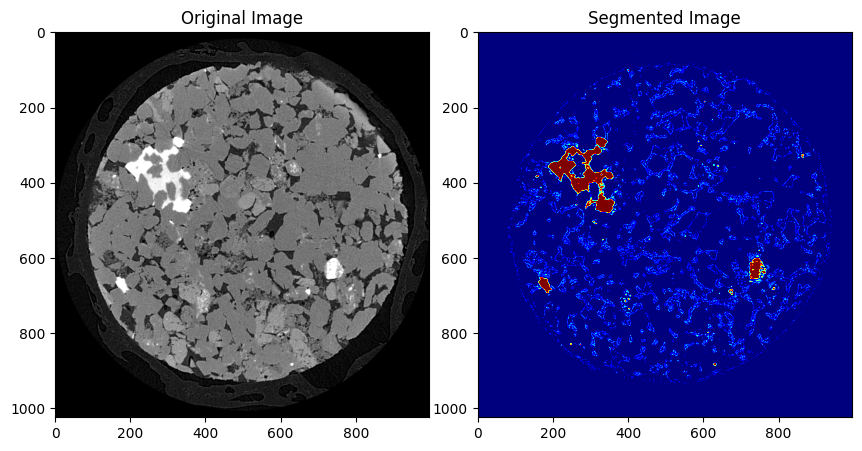

In [41]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(20,5))

fig.add_subplot(1,1,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

fig.add_subplot(1,2,2)
plt.title('Segmented Image')
plt.imshow(segmented, cmap ='jet')

plt.imsave('segmented_rock_estim.jpg', segmented, cmap ='jet')